In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE

In [4]:
pd.set_option('display.max_columns', 25)

In [5]:
dataset_url = './dataset/AIDS_Classification.csv'

df = pd.read_csv(dataset_url, sep=",")

In [6]:
df.shape

(2139, 23)

In [7]:
df.tail(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
2134,1091,3,21,53.2980,1,0,0,100,0,1,842,0,1,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,417,1,1,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,753,1,1,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,0,0,1,0,1,0,0,0,166,169,999,1838,1
2138,1045,3,45,77.3000,1,0,0,100,0,0,0,0,1,0,1,0,1,0,911,930,885,526,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [9]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,379.175783,0.288453,0.827957,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,468.657526,0.453149,0.377506,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,142.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,739.500000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,2851.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'trt'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'wtkg'}>,
        <Axes: title={'center': 'hemo'}>],
       [<Axes: title={'center': 'homo'}>,
        <Axes: title={'center': 'drugs'}>,
        <Axes: title={'center': 'karnof'}>,
        <Axes: title={'center': 'oprior'}>,
        <Axes: title={'center': 'z30'}>],
       [<Axes: title={'center': 'preanti'}>,
        <Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'str2'}>,
        <Axes: title={'center': 'strat'}>],
       [<Axes: title={'center': 'symptom'}>,
        <Axes: title={'center': 'treat'}>,
        <Axes: title={'center': 'offtrt'}>,
        <Axes: title={'center': 'cd40'}>,
        <Axes: title={'center': 'cd420'}>],
       [<Axes: title={'center': 'cd80'}>,
        <Axes: title={'center': 'cd820'}>,
        <Axes: title={'center': 'infected'}>, <Axes: >, <Axes: >

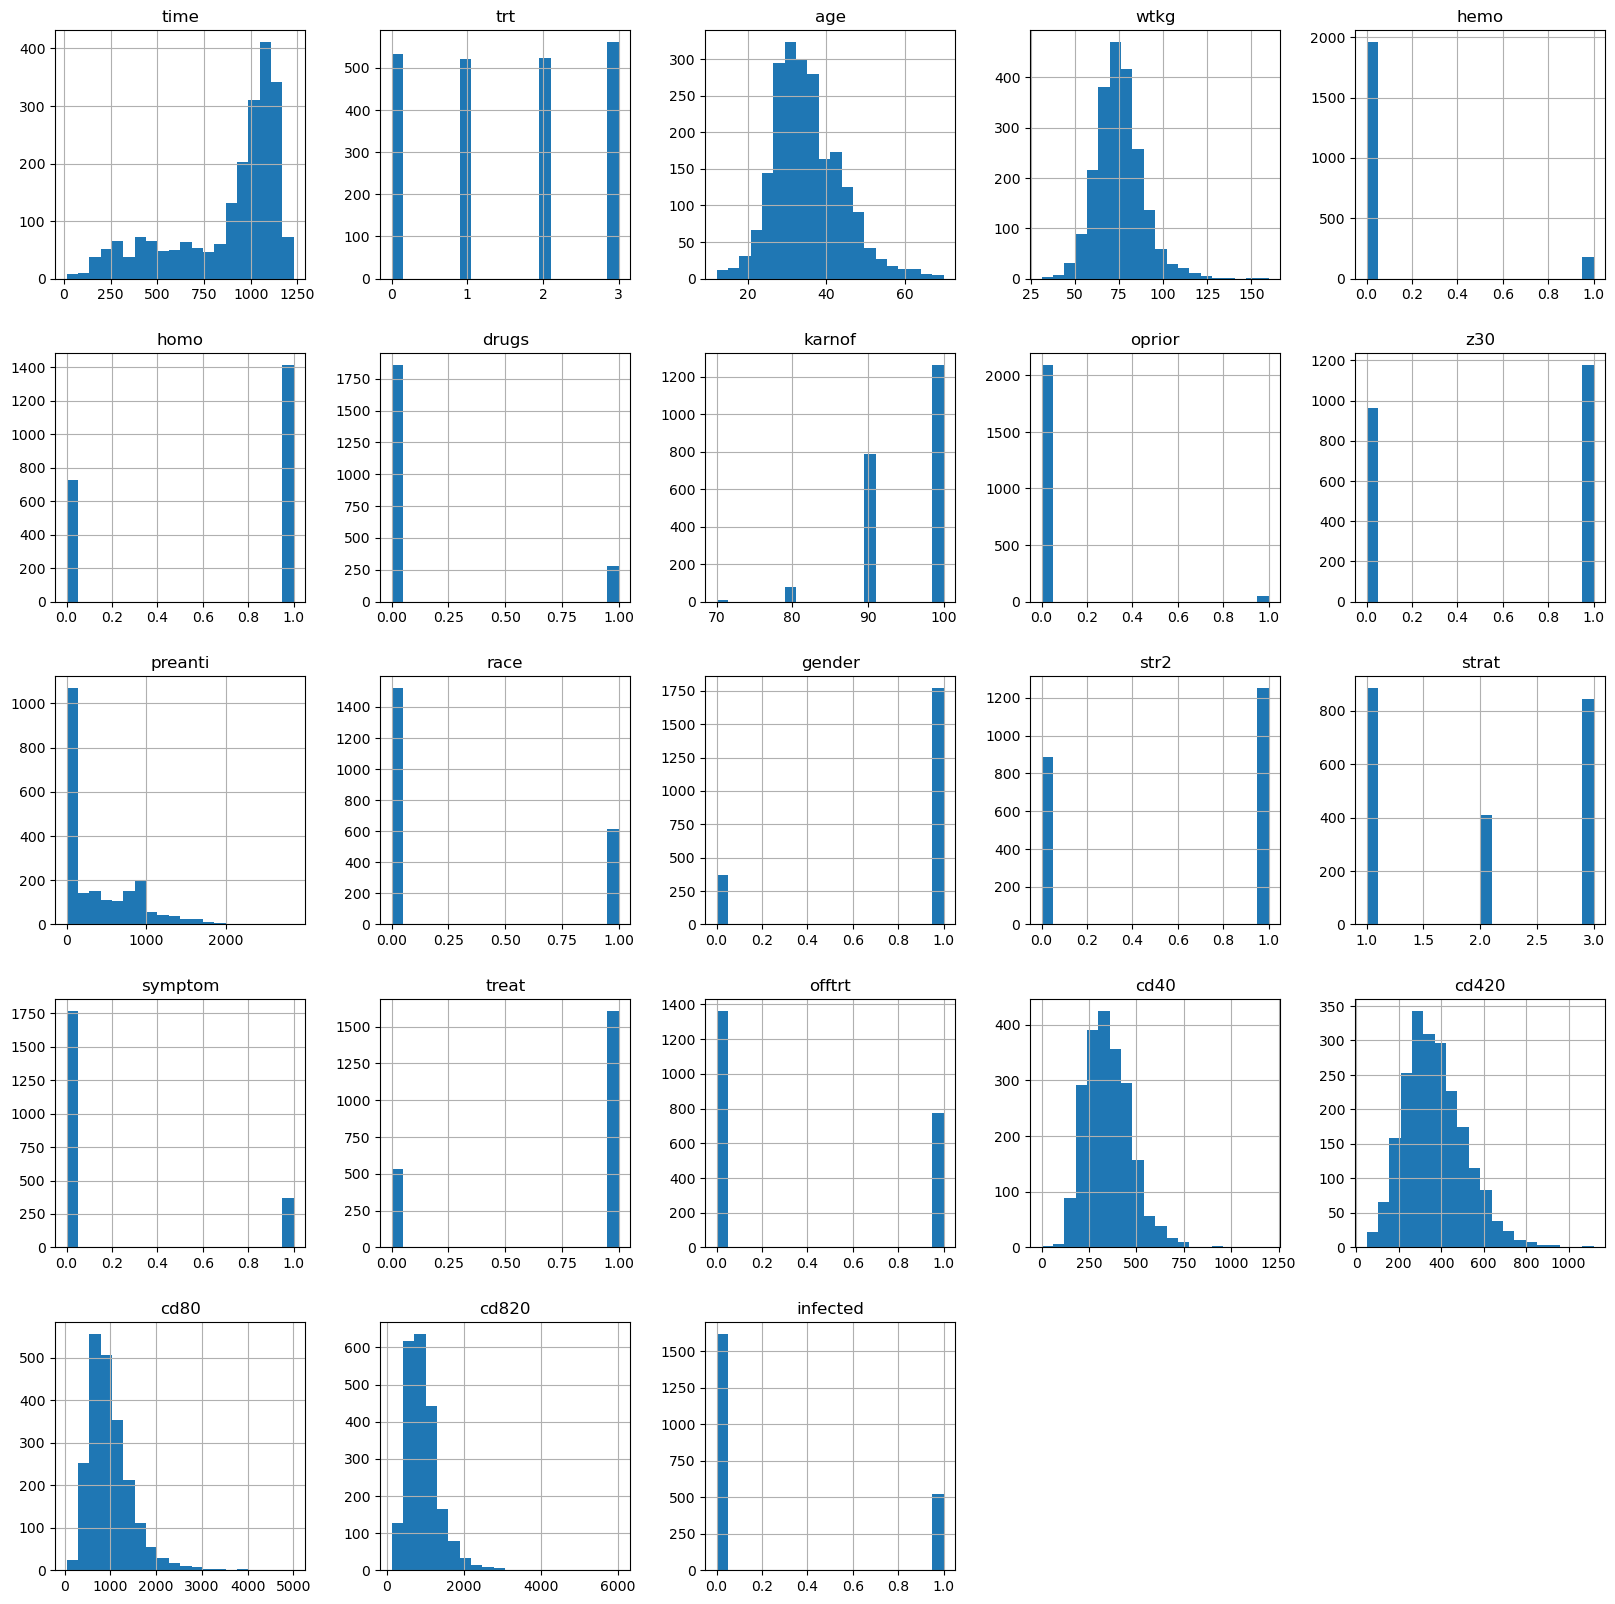

In [10]:
df.hist(figsize=(20, 20), bins=20)

In [11]:
tree = DecisionTreeClassifier()

In [12]:
train, test = train_test_split(df, test_size=0.2, stratify=df["infected"])

In [13]:
print(train.shape)
print(test.shape)

(1711, 23)
(428, 23)


In [14]:
X_train = train.drop(["infected"], axis=1)
Y_train = train["infected"]
X_test = test.drop(["infected"], axis=1)
Y_test = test["infected"]

In [15]:
smote = SMOTE(sampling_strategy=0.8, n_jobs=-1)

In [16]:
#X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [17]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [18]:
Y_pred = tree.predict(X_test)

In [19]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       324
           1       0.63      0.71      0.67       104

    accuracy                           0.83       428
   macro avg       0.77      0.79      0.77       428
weighted avg       0.84      0.83      0.83       428



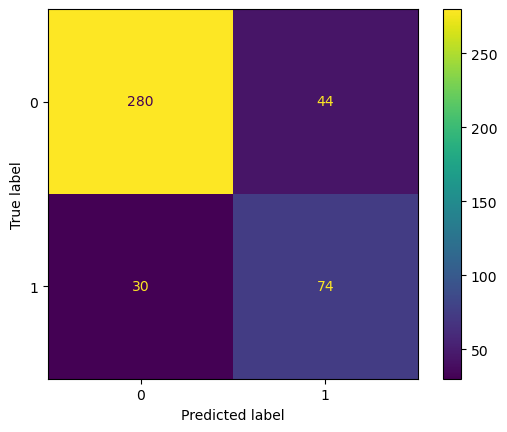

In [20]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [22]:
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [23]:
Y_pred = rf.predict(X_test)

In [24]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       324
           1       0.82      0.76      0.79       104

    accuracy                           0.90       428
   macro avg       0.87      0.85      0.86       428
weighted avg       0.90      0.90      0.90       428



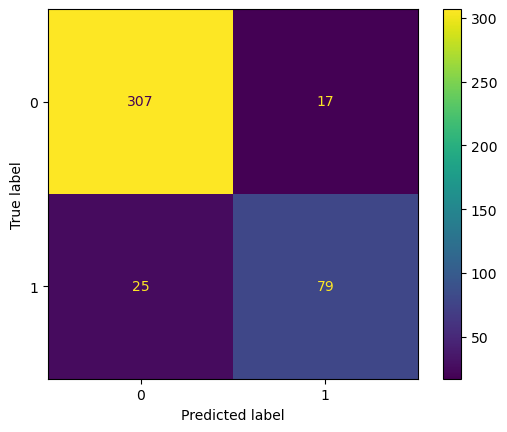

In [25]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()